In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#**DATA PREPROCESSING**


In [44]:
df = pd.read_csv('/content/traffic.csv')

In [45]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [46]:
df.isna().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [47]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [48]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [49]:
df.shape

(2976, 9)

In [50]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [51]:
df.nunique()

,0
Time,96
Date,31
Day of the week,7
CarCount,172
BikeCount,71
BusCount,51
TruckCount,41
Total,239
Traffic Situation,4


In [52]:
print(df['Time'].head())


0    12:00:00 AM
1    12:15:00 AM
2    12:30:00 AM
3    12:45:00 AM
4     1:00:00 AM
Name: Time, dtype: object


In [53]:
df.duplicated().sum()

0

In [54]:
sum_values = num_col.sum()
min_values = num_col.min()
max_values = num_col.max()

print(sum_values)
print(min_values)
print(max_values)

Date           47616
CarCount      204441
BikeCount      44394
BusCount       45472
TruckCount     45607
Total         339914
dtype: int64
Date           1
CarCount       6
BikeCount      0
BusCount       0
TruckCount     0
Total         21
dtype: int64
Date           31
CarCount      180
BikeCount      70
BusCount       50
TruckCount     40
Total         279
dtype: int64


In [55]:
print(df.describe(include='all'))

               Time         Date Day of the week     CarCount    BikeCount  \
count          2976  2976.000000            2976  2976.000000  2976.000000   
unique           96          NaN               7          NaN          NaN   
top     12:00:00 AM          NaN         Tuesday          NaN          NaN   
freq             31          NaN             480          NaN          NaN   
mean            NaN    16.000000             NaN    68.696573    14.917339   
std             NaN     8.945775             NaN    45.850693    12.847518   
min             NaN     1.000000             NaN     6.000000     0.000000   
25%             NaN     8.000000             NaN    19.000000     5.000000   
50%             NaN    16.000000             NaN    64.000000    12.000000   
75%             NaN    24.000000             NaN   107.000000    22.000000   
max             NaN    31.000000             NaN   180.000000    70.000000   

           BusCount   TruckCount        Total Traffic Situation

# EDA

**explore outliers**

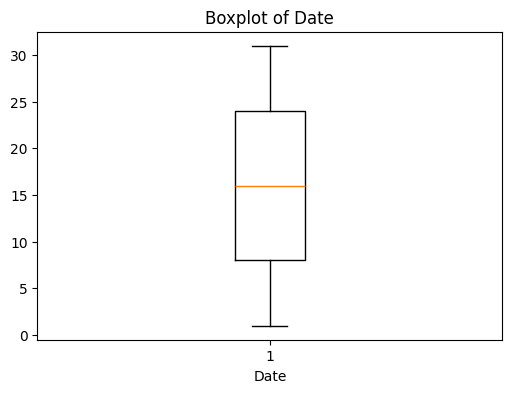

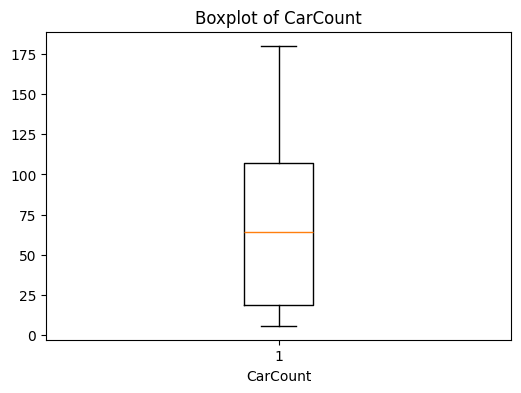

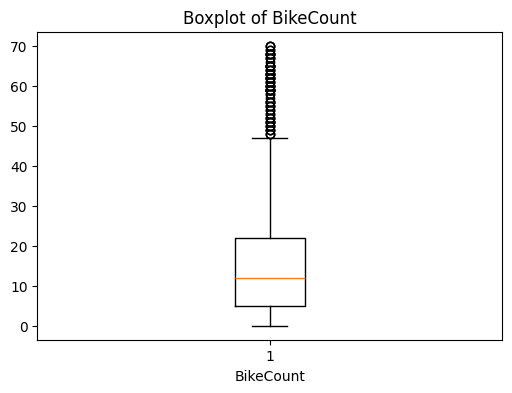

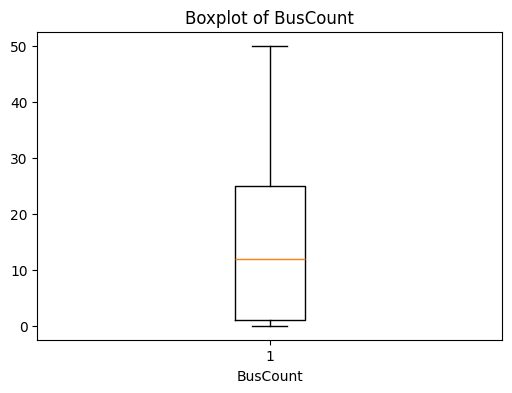

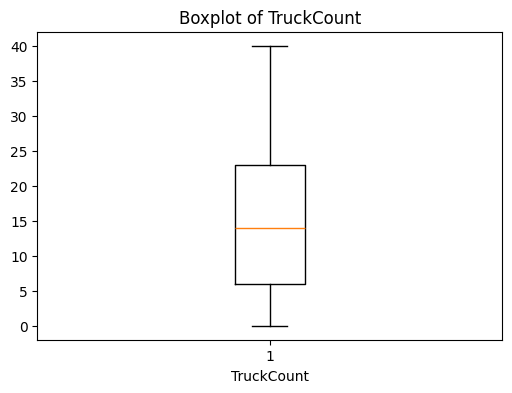

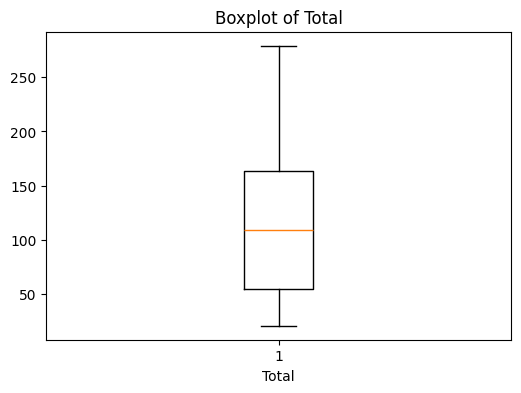

In [56]:
for col in num_col:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()   #EXPLORE OUTLIERS

**remove outliers**

In [57]:

print(df.head())
print("\nBasic information about the dataset:")
print(df.info())
print("\nSummary statistics of the dataset:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   in

In [58]:
df['Total Vehicle Count'] = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum(axis=1)



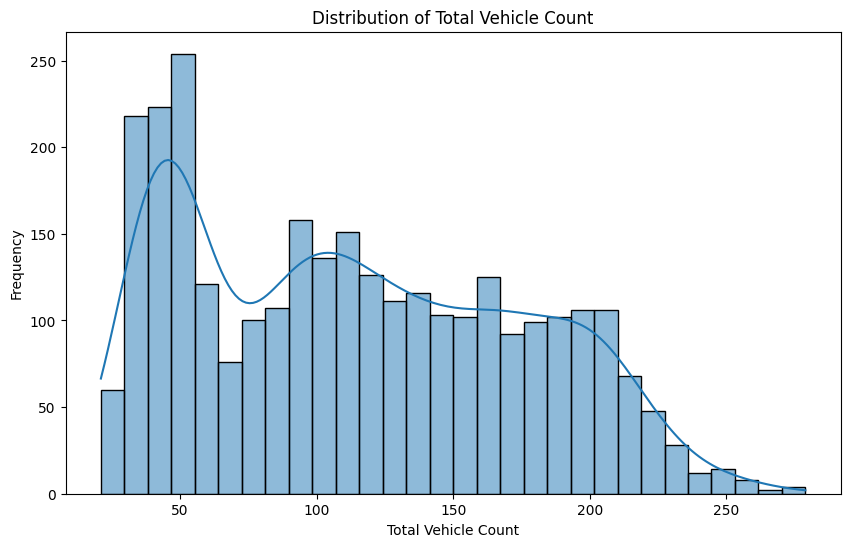

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Vehicle Count'], bins=30, kde=True)
plt.title('Distribution of Total Vehicle Count')
plt.xlabel('Total Vehicle Count')
plt.ylabel('Frequency')
plt.show()


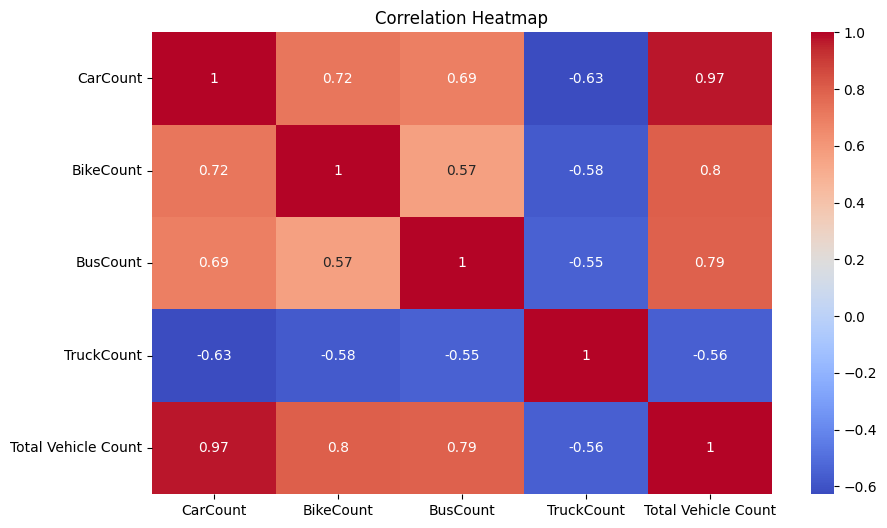

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total Vehicle Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


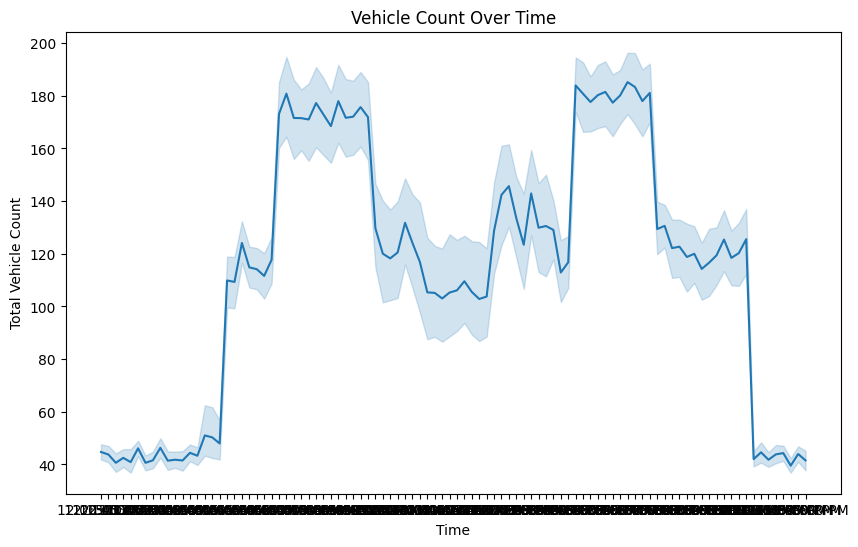

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Total Vehicle Count', data=df)
plt.title('Vehicle Count Over Time')
plt.xlabel('Time')
plt.ylabel('Total Vehicle Count')
plt.show()


**CARS DISTIRIBUTION BOXPLOT**

<ipython-input-62-eb5a0accd270>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot=plt.boxplot(data, labels=['Cars', 'Bikes', 'Buses', 'Trucks'],patch_artist=True)


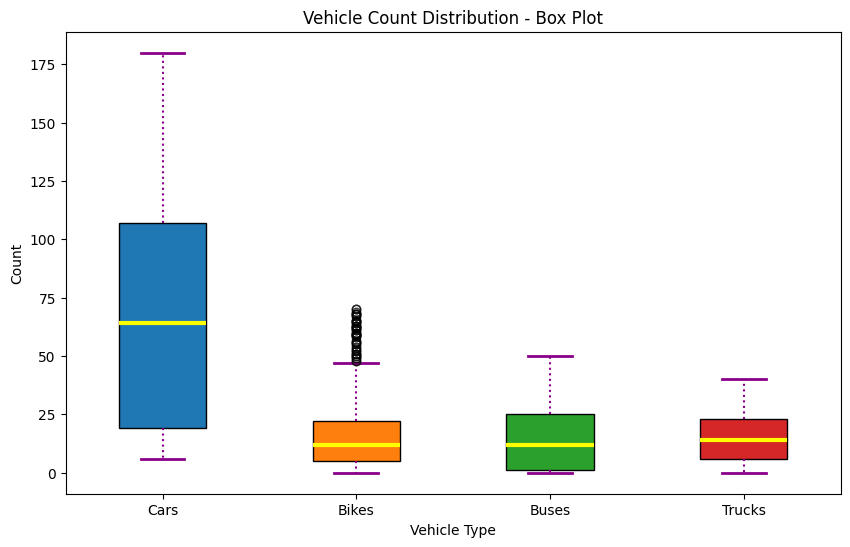

In [62]:
data = [df['CarCount'], df['BikeCount'], df['BusCount'], df['TruckCount']]
plt.figure(figsize=(10, 6))

boxplot=plt.boxplot(data, labels=['Cars', 'Bikes', 'Buses', 'Trucks'],patch_artist=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
for whisker in boxplot['whiskers']:
    whisker.set(color='#8B008B', linewidth=1.5, linestyle=":")

for cap in boxplot['caps']:
    cap.set(color='#8B008B', linewidth=2)

for median in boxplot['medians']:
    median.set(color='yellow', linewidth=3)

for flier in boxplot['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.title('Vehicle Count Distribution - Box Plot')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()


**CARS DISTIRIBUTION**



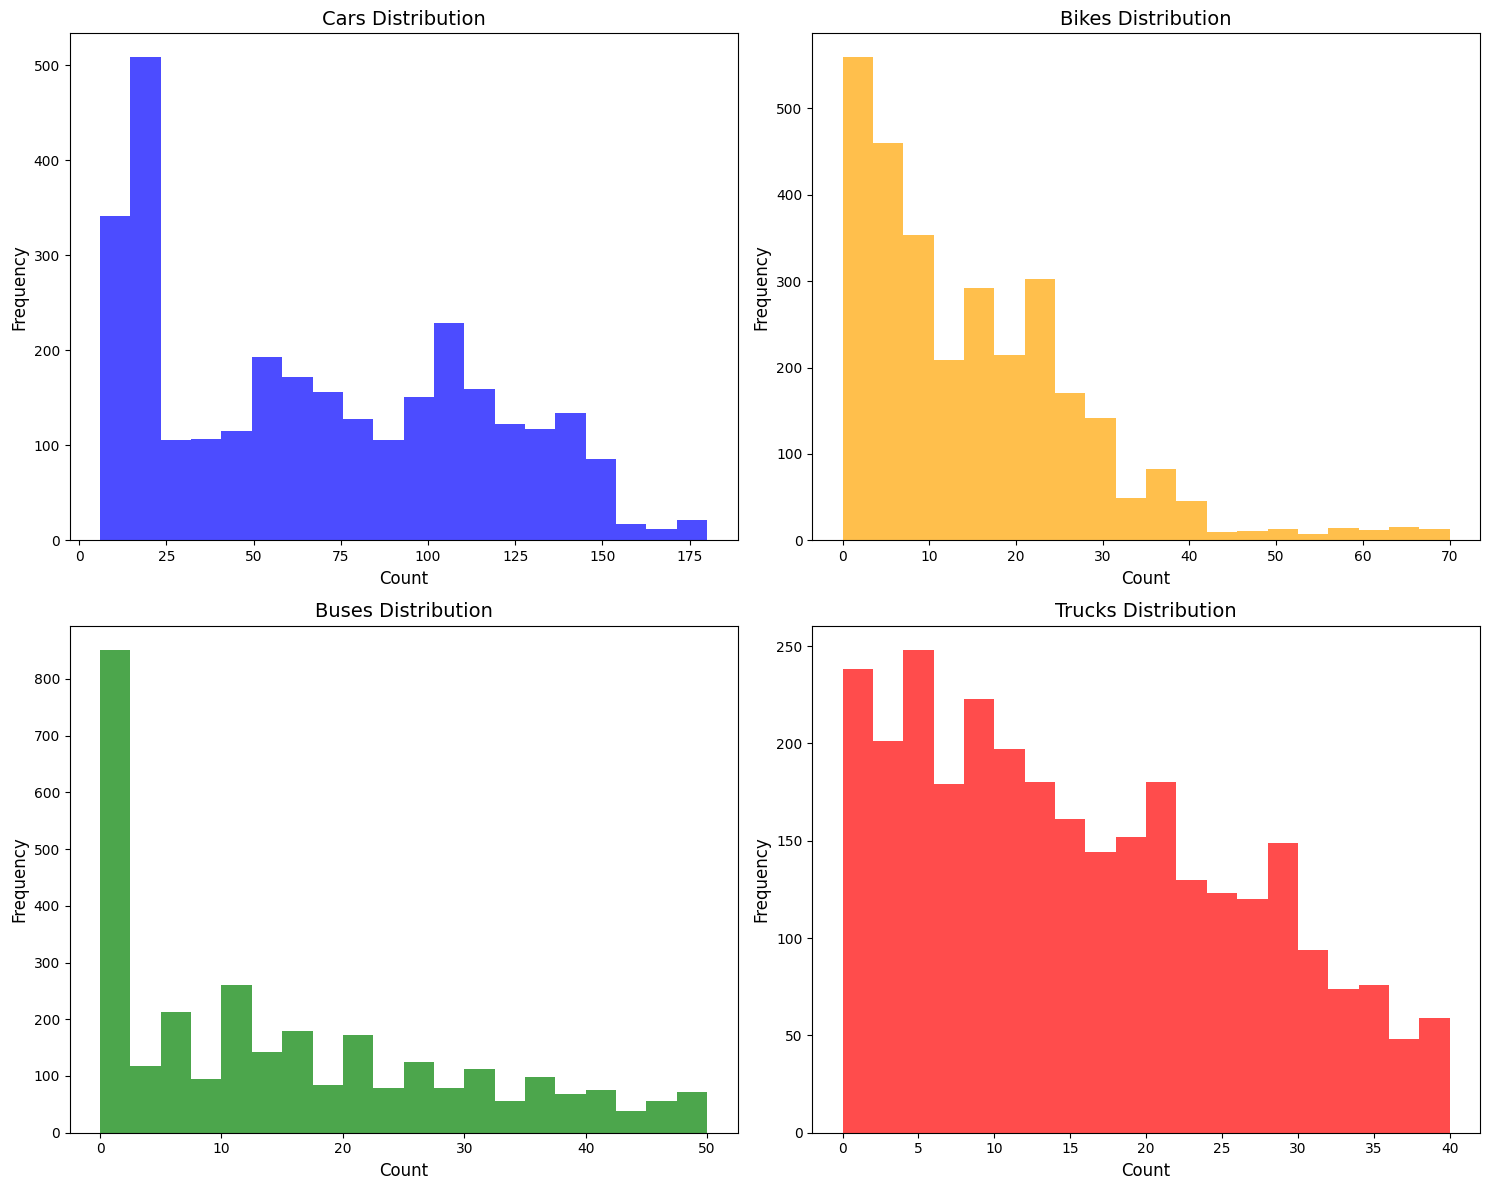

In [63]:
plt.figure(figsize=(15, 12))


plt.subplot(2, 2, 1)
plt.hist(df['CarCount'], bins=20, alpha=0.7, color='blue')
plt.title('Cars Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2, 2, 2)
plt.hist(df['BikeCount'], bins=20, alpha=0.7, color='orange')
plt.title('Bikes Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.subplot(2, 2, 3)
plt.hist(df['BusCount'], bins=20, alpha=0.7, color='green')
plt.title('Buses Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.subplot(2, 2, 4)
plt.hist(df['TruckCount'], bins=20, alpha=0.7, color='red')
plt.title('Trucks Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()


**TRAFFIC SITUATION**

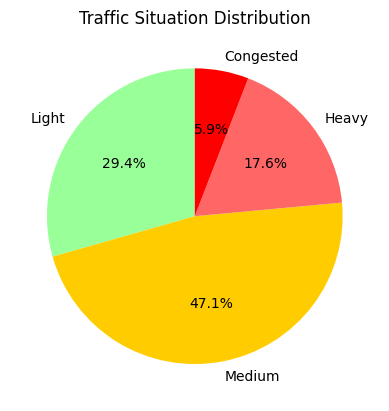

In [64]:
data = {'Traffic Situation': ['Light', 'Medium', 'Heavy', 'Congested'],
        'Count': [500, 800, 300, 100]}
df = pd.DataFrame(data).set_index('Traffic Situation')


colors = ['#99FF99', '#FFCC00', '#FF6666', '#FF0000']


plt.pie(df['Count'], labels=df.index, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Traffic Situation Distribution')

plt.show()




In [65]:
df = pd.read_csv('/content/traffic.csv')

In [66]:

df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


ى


In [67]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


**Variation of Vehicle Count by Day of the Week**

<ipython-input-68-ba95f90fa58a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day of the week', y='CarCount', palette='Blues', ax=axs[0, 0])
<ipython-input-68-ba95f90fa58a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day of the week', y='BikeCount', palette='Greens', ax=axs[0, 1])
<ipython-input-68-ba95f90fa58a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day of the week', y='BusCount', palette='Oranges', ax=axs[1, 0])
<ipython-input-68-ba95f90fa58a>:6: FutureWarning: 

Passing `palette` witho

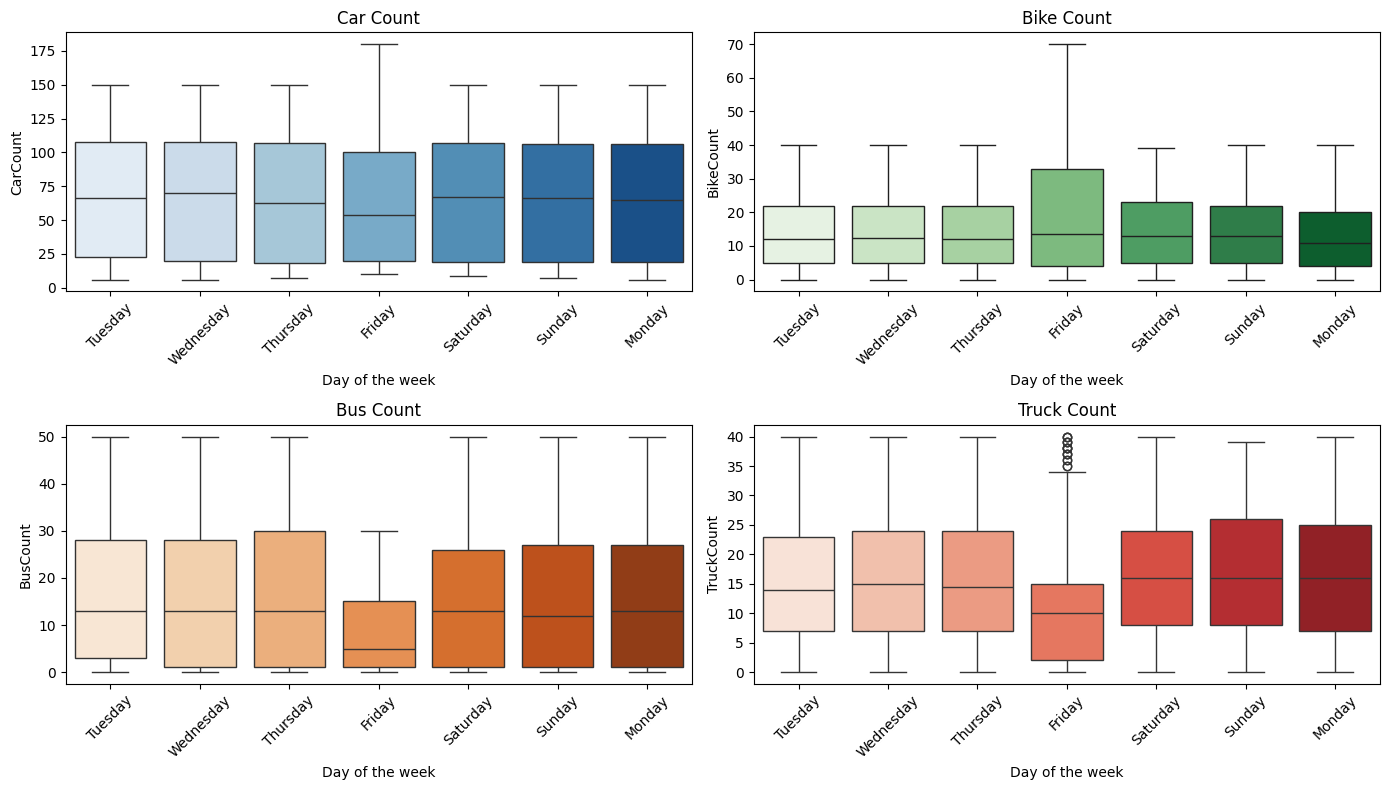

In [68]:

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sns.boxplot(data=df, x='Day of the week', y='CarCount', palette='Blues', ax=axs[0, 0])
sns.boxplot(data=df, x='Day of the week', y='BikeCount', palette='Greens', ax=axs[0, 1])
sns.boxplot(data=df, x='Day of the week', y='BusCount', palette='Oranges', ax=axs[1, 0])
sns.boxplot(data=df, x='Day of the week', y='TruckCount', palette='Reds', ax=axs[1, 1])

axs[0, 0].set_title('Car Count')
axs[0, 1].set_title('Bike Count')
axs[1, 0].set_title('Bus Count')
axs[1, 1].set_title('Truck Count')

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




**Car Count vs. Traffic Situation**

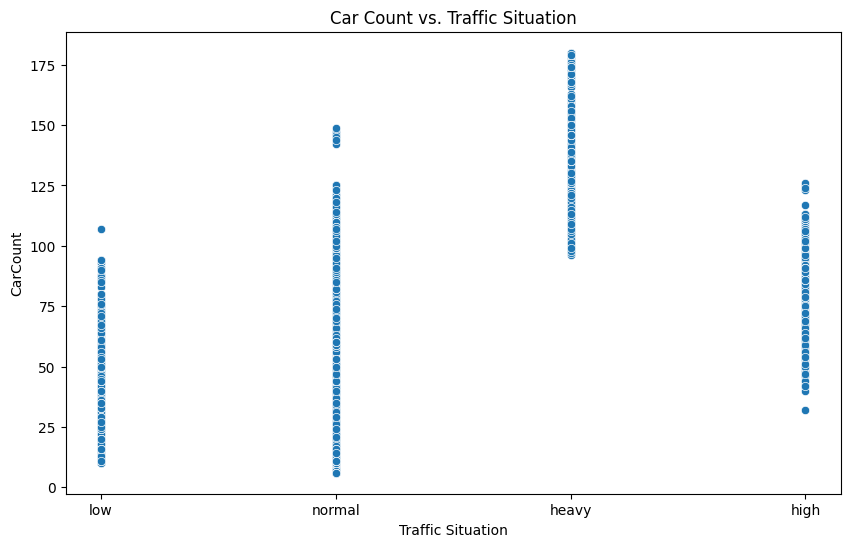

In [69]:
# Scatter plot for car count vs. traffic situation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traffic Situation', y='CarCount', data=df)
plt.title('Car Count vs. Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('CarCount')
plt.show()

**Bike Count vs. Traffic Situation**

<ipython-input-70-f3b59c602aff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic Situation', y='BikeCount', data=df, estimator=sum, palette='viridis')


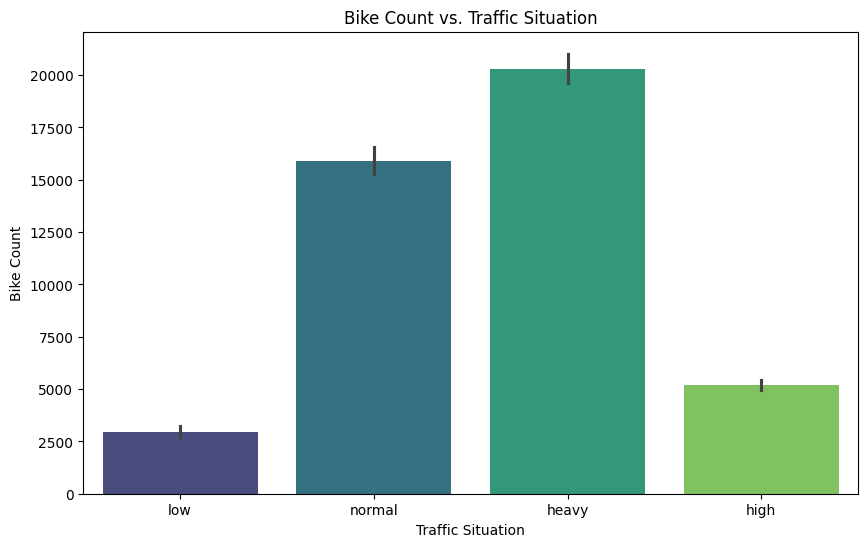

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Traffic Situation', y='BikeCount', data=df, estimator=sum, palette='viridis')
plt.title('Bike Count vs. Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Bike Count')
plt.show()



**Bus Count vs. Traffic Situation**

<ipython-input-71-528795fca73d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y='BusCount', data=df, palette='coolwarm')


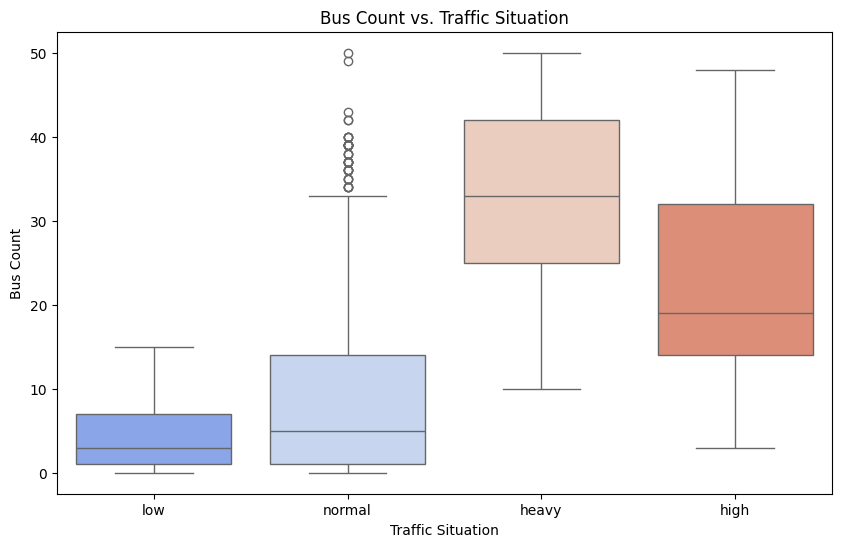

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Situation', y='BusCount', data=df, palette='coolwarm')
plt.title('Bus Count vs. Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Bus Count')
plt.show()


**Truck Count vs. Traffic Situation**

<ipython-input-72-c1342b618ef7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Traffic Situation', y='TruckCount', data=df, palette='coolwarm')


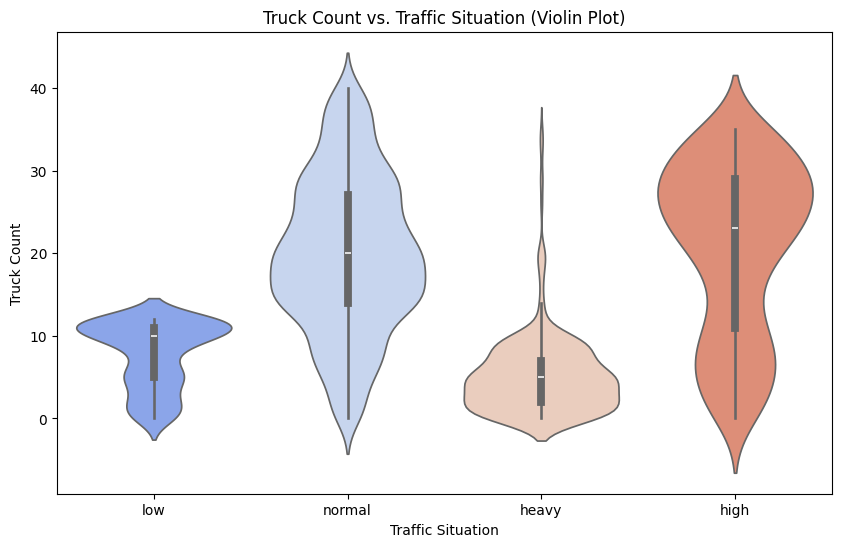

In [72]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Traffic Situation', y='TruckCount', data=df, palette='coolwarm')
plt.title('Truck Count vs. Traffic Situation (Violin Plot)')
plt.xlabel('Traffic Situation')
plt.ylabel('Truck Count')
plt.show()


**Total Vehicle Count vs. Traffic Situation**

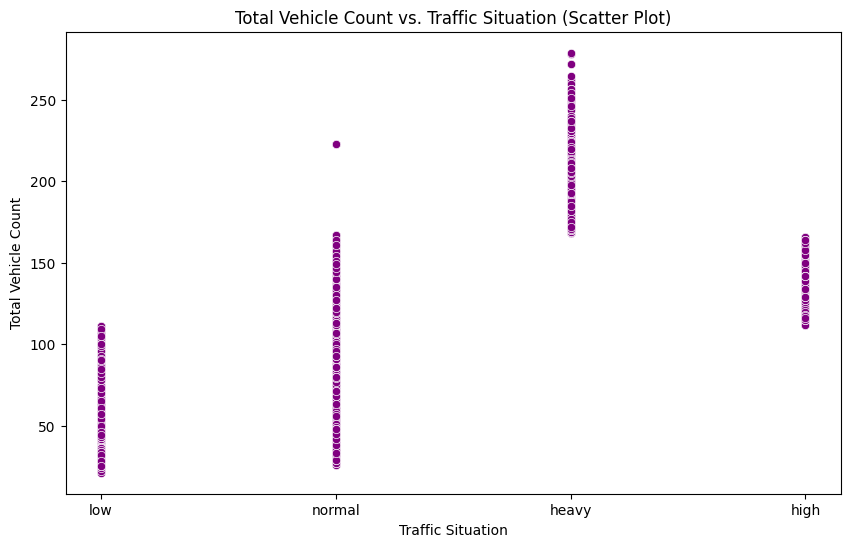

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traffic Situation', y='Total', data=df, color='purple')
plt.title('Total Vehicle Count vs. Traffic Situation (Scatter Plot)')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.show()


In [74]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

<ipython-input-74-04eab34d480d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


**Busiest Hours of the Day**

<ipython-input-75-33a35e5260b4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Total', data=hourly_traffic, palette='coolwarm')


   Hour  Total
0     0   5322
1     1   5247
2     2   5304
3     3   5861
4     4  12130


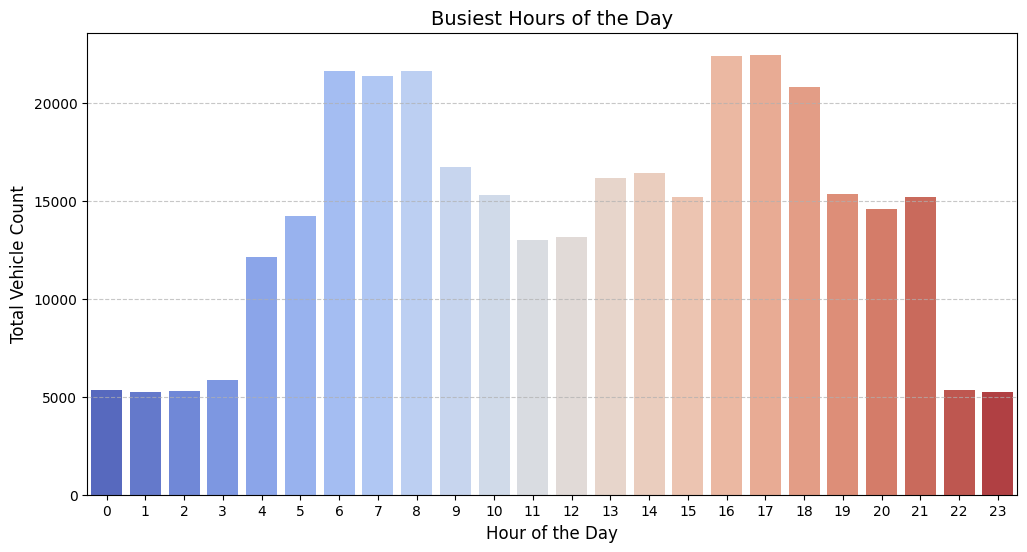

In [75]:
df['Hour'] = df['Time'].dt.hour

hourly_traffic = df.groupby('Hour')['Total'].sum().reset_index()


print(hourly_traffic.head())

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Total', data=hourly_traffic, palette='coolwarm')
plt.title('Busiest Hours of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Vehicle Count', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**traffic Situation dist by day of the week**

<ipython-input-76-7ff262392be8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day of the week', y='Traffic Situation', palette='coolwarm')


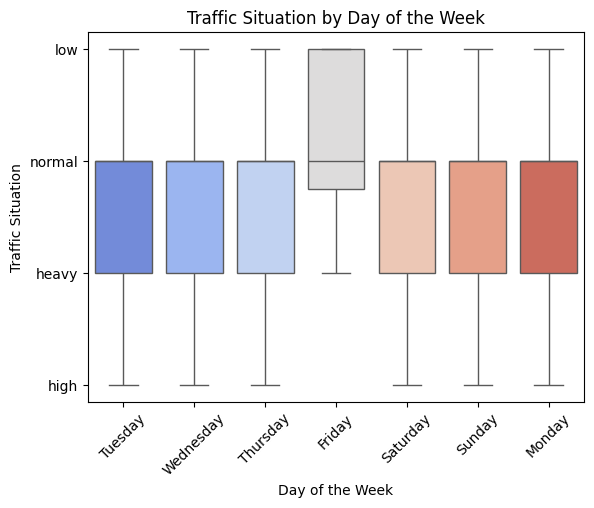

In [76]:

sns.boxplot(data=df, x='Day of the week', y='Traffic Situation', palette='coolwarm')
plt.title('Traffic Situation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Situation')
plt.xticks(rotation=45)
plt.show()

Friday is less

**12.The Correlations between vehicle types**

<Axes: >

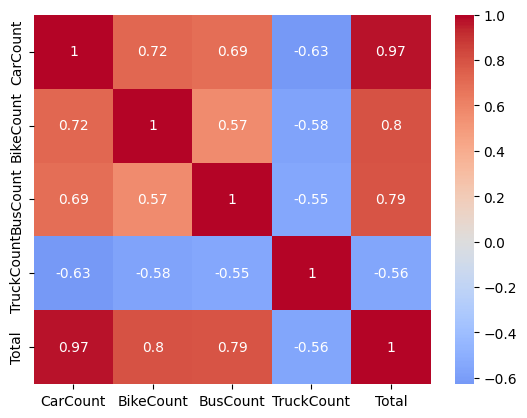

In [77]:

Numeric_col=["CarCount","BikeCount","BusCount","TruckCount","Total"]
sns.heatmap(df[Numeric_col].corr(), annot=True, cmap='coolwarm', center=0)

13. Distribution of Traffic situations by Hour

<ipython-input-78-3f8e3aae851b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Date", y="Traffic Situation", palette='coolwarm')


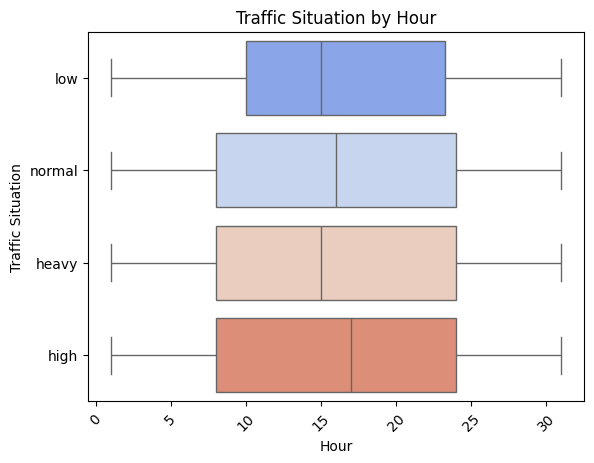

In [78]:
sns.boxplot(data=df, x="Date", y="Traffic Situation", palette='coolwarm')
plt.title('Traffic Situation by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Situation')
plt.xticks(rotation=45)
plt.show()

**14.distribution of total vehicle Counts for each day of the week**

<ipython-input-79-cf622f308de5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day of the week', y='Total', palette='Blues')


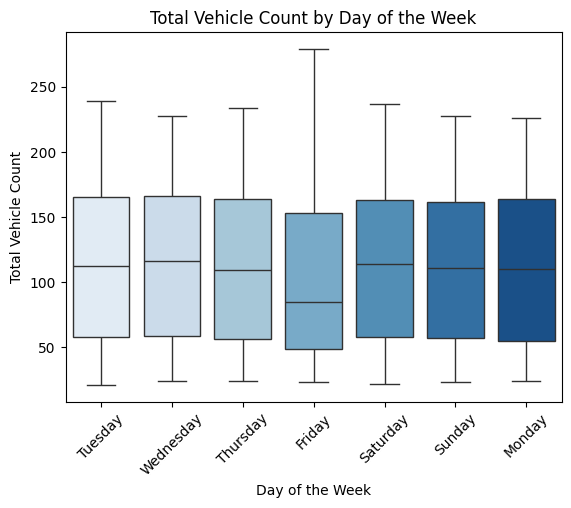

In [79]:

sns.boxplot(data=df, x='Day of the week', y='Total', palette='Blues')
plt.title('Total Vehicle Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicle Count')
plt.xticks(rotation=45)
plt.show()

Friday is the less

15.**Vehicle Count Variances by Type**

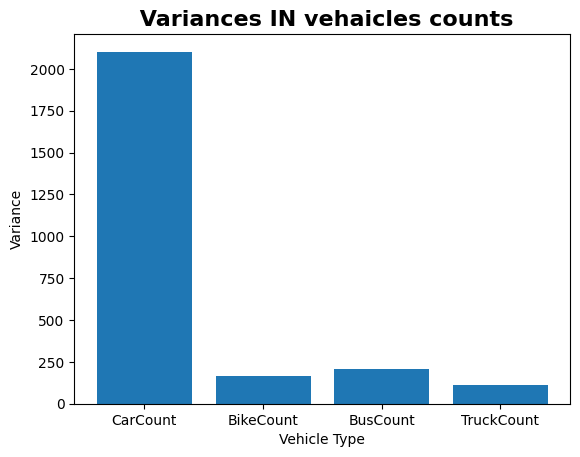

In [84]:
vehicle_types = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
plt.bar(vehicle_types, [df[vehicle].var() for vehicle in vehicle_types])
plt.title(' Variances IN vehaicles counts', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('Variance')
plt.show()



**Cars have the highest vehicle counts.**


16.Average Vehicle Counts Over Time **bold text**


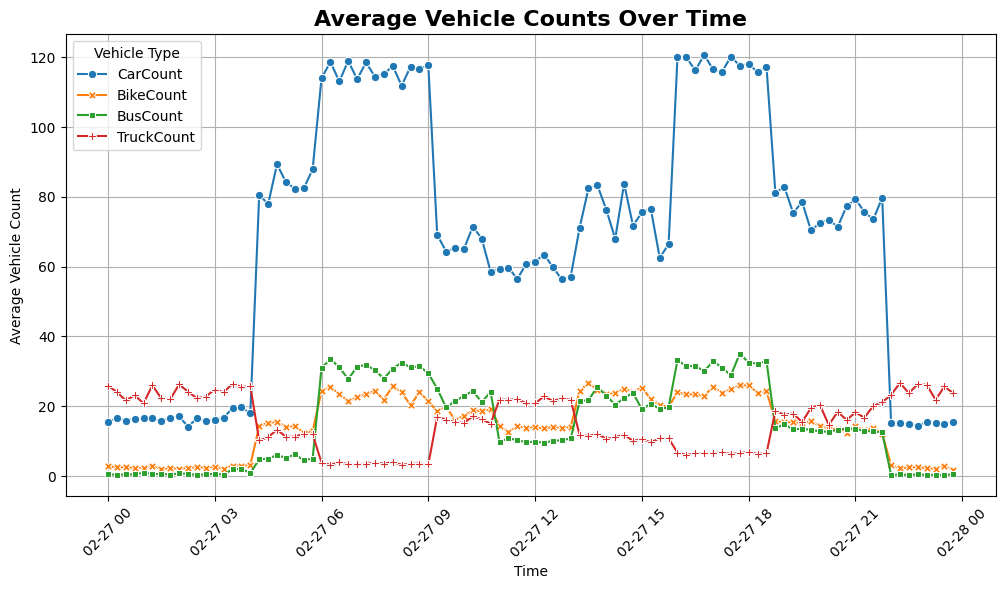

In [85]:
avg_counts = df.groupby('Time')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_counts, markers=True, dashes=False)
plt.xlabel("Time")
plt.ylabel("Average Vehicle Count")
plt.title("Average Vehicle Counts Over Time", fontsize=16, fontweight='bold')
plt.legend(title="Vehicle Type", loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**The car count is the highest among all vehicle types and shows the most increase between 3:40 AM and 8:20 AM.**